# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

---

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(.1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | vila do maio
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | marsh harbour
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | bakaly
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | pemangkat
Processing Record 12 of Set 1 | tutoia
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | cabedelo
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | mana
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | anabar
City not found. Skipping...
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | al hadd
Processing Record 21 of Set 1 | ouellah
City not found.

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,-9.60,71,61,4.36,GL,1737258463
1,hawaiian paradise park,19.5933,-154.9731,23.73,73,20,5.66,US,1737258463
2,east london,-33.0153,27.9116,21.52,83,75,2.06,ZA,1737258463
3,vila do maio,15.1333,-23.2167,21.93,64,8,7.51,CV,1737258463
4,ushuaia,-54.8000,-68.3000,7.04,96,100,1.69,AR,1737258234


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/GURU/Desktop/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("/Users/GURU/Desktop/python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,-9.60,71,61,4.36,GL,1737258463
1,hawaiian paradise park,19.5933,-154.9731,23.73,73,20,5.66,US,1737258463
2,east london,-33.0153,27.9116,21.52,83,75,2.06,ZA,1737258463
3,vila do maio,15.1333,-23.2167,21.93,64,8,7.51,CV,1737258463
4,ushuaia,-54.8000,-68.3000,7.04,96,100,1.69,AR,1737258234


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

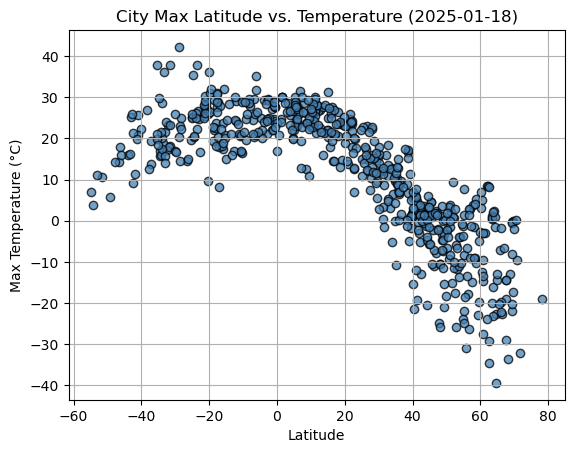

In [8]:
# # Build scatter plot for latitude vs. temperature
# # YOUR CODE HERE
latitudes = city_data_df['Lat']
temperatures = city_data_df['Max Temp']
plt.scatter(latitudes, temperatures, c='steelblue', edgecolors='black', alpha=0.75)

# # Incorporate the other graph properties
# # YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2025-01-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)


# # Save the figure
plt.savefig("/Users/GURU/Desktop/python-api-challenge/output_data/Fig1.png")

# # Show plot
plt.show()


#### Latitude Vs. Humidity

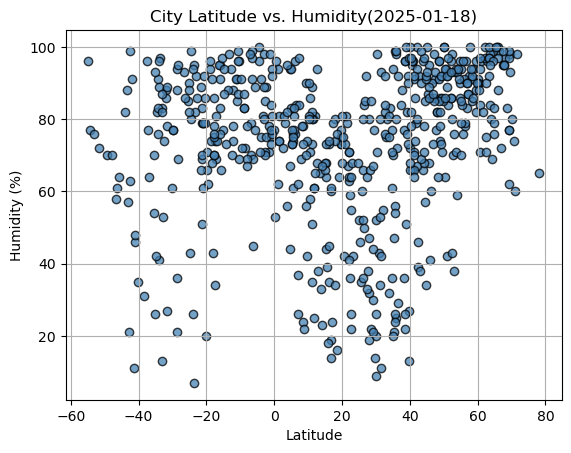

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
latitudes = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(latitudes, humidity, c='steelblue', edgecolors='black', alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity(2025-01-18)") 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("/Users/GURU/Desktop/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

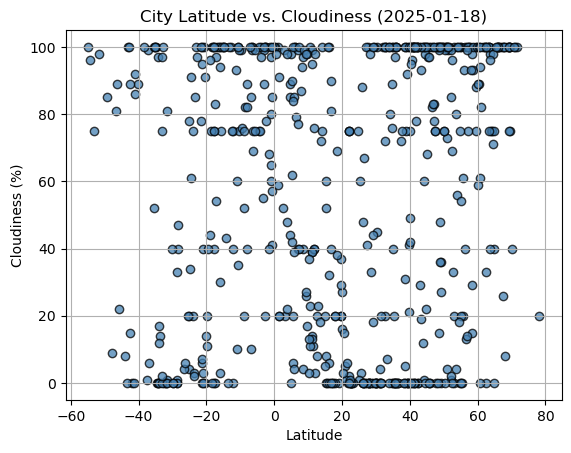

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
latitudes = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitudes, cloudiness, c='steelblue', edgecolors='black', alpha=0.75)
                                    
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2025-01-18)") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("/Users/GURU/Desktop/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

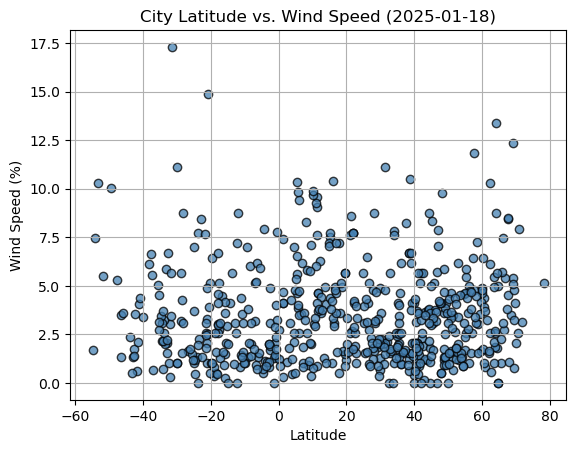

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
latitudes = city_data_df['Lat']
WindSpeed = city_data_df['Wind Speed']
plt.scatter(latitudes, WindSpeed, c='steelblue', edgecolors='black', alpha=0.75)
                                    
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2025-01-18)") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid(True)

# Save the figure
plt.savefig("/Users/GURU/Desktop/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, file_name):
#Perform Linear Regression    
    slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,-9.60,71,61,4.36,GL,1737258463
1,hawaiian paradise park,19.5933,-154.9731,23.73,73,20,5.66,US,1737258463
3,vila do maio,15.1333,-23.2167,21.93,64,8,7.51,CV,1737258463
5,marsh harbour,26.5412,-77.0636,23.12,84,67,5.17,BS,1737258464
8,bakaly,55.1789,53.8028,-8.32,94,100,5.47,RU,1737258464


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,east london,-33.0153,27.9116,21.52,83,75,2.06,ZA,1737258463
4,ushuaia,-54.8000,-68.3000,7.04,96,100,1.69,AR,1737258234
6,waitangi,-43.9535,-176.5597,16.01,82,8,2.38,NZ,1737258464
7,adamstown,-25.0660,-130.1015,25.14,90,4,3.68,PN,1737258464
11,tutoia,-2.7619,-42.2744,24.63,85,100,2.00,BR,1737258465


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.74012010915494


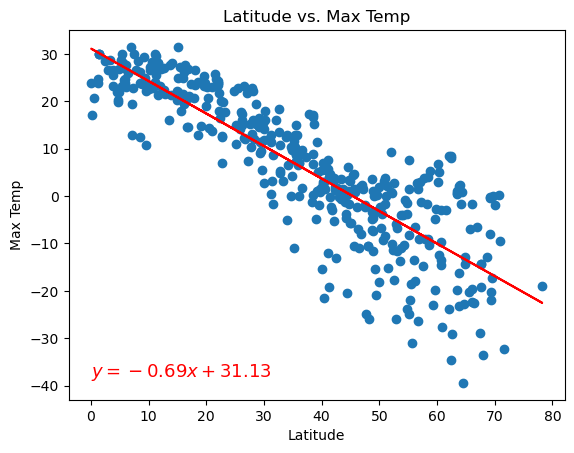

In [15]:
# # Linear regression on Northern Hemisphere
# # YOUR CODE HERE

import matplotlib.pyplot as plt
from scipy.stats import linregress

# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, r_value, _, _) = linregress(x_values, y_values)

# Print the r^2 value
print(f"The r^2-value is: {r_value**2:}")

# Create regression line values
regress_values = x_values * slope + intercept

# Plot the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", label=f"$y = {slope:.2f}x + {intercept:.2f}$")

# Incorporate other graph properties
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Annotate the linear regression equation at the bottom left
plt.annotate(f"$y = {slope:.2f}x + {intercept:.2f}$", (min(x_values), min(y_values)), fontsize=13, color="red", verticalalignment='bottom')

# Show plot
plt.show()



The r^2-value is: 0.17730827074390895


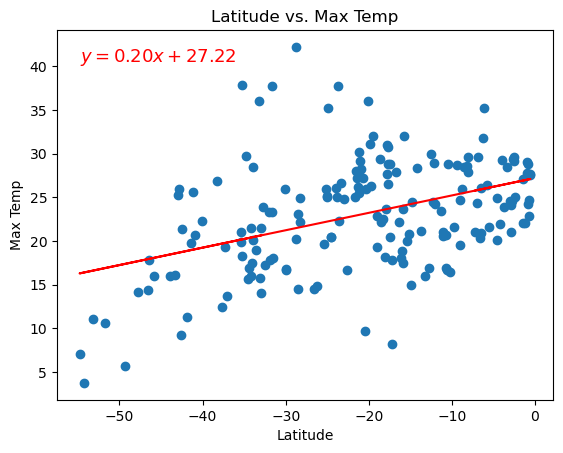

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, r_value, _, _) = linregress(x_values, y_values)

# Print the r^2 value
print(f"The r^2-value is: {r_value**2:}")

# Create regression line values
regress_values = x_values * slope + intercept

# Plot the scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", label=f"$y = {slope:.2f}x + {intercept:.2f}$")

# Incorporate other graph properties
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Annotate the linear regression equation
plt.annotate(f"$y = {slope:.2f}x + {intercept:.2f}$", (min(x_values), max(y_values)), fontsize=13, color="red", verticalalignment='top')
# Show plot
plt.show()


**Discussion about the linear relationship:** 
Northern Hemisphere

Linear Regression Equation:
y=−0.69x + 31.13

Negative Slope: The slope of -0.69 indicates a strong negative correlation between latitude and maximum temperature. For every degree increase in latitude, the maximum temperature decreases by 0.69°C. This aligns with the general understanding that higher latitudes (closer to the poles) are cooler.

Intercept: The y-intercept of 31.13 represents the predicted maximum temperature at the equator (latitude = 0). This value suggests that temperatures are quite high near the equator, as expected.

Graphical Representation:
On a scatter plot, the data points representing maximum temperature at various latitudes show a downward trend as latitude increases.
The regression line with a negative slope cuts through these data points, illustrating the overall trend of decreasing temperatures with increasing latitude.

R-squared Value (0.74):
The R² value of 0.74 indicates that 74% of the variability in maximum temperature can be explained by latitude. This high R² value reflects a strong linear relationship between latitude and maximum temperature.

Southern Hemisphere

Linear Regression Equation:
y=0.20x + 27.22

Positive Slope: The slope of 0.20 indicates a positive correlation between latitude and maximum temperature, which is somewhat unexpected. For every degree increase in latitude, the maximum temperature increases by 0.20°C.

Intercept: The y-intercept of 27.22 represents the predicted maximum temperature at the equator (latitude = 0). This value is slightly lower than the intercept for the Northern Hemisphere, but still indicates warm temperatures near the equator.

Graphical Representation:
On a scatter plot, the data points might show an upward trend as latitude increases, resulting in a positive slope for the regression line.
This positive trend suggests that factors other than latitude, such as ocean currents, altitude, and regional climatic conditions, play significant roles in determining temperatures in the Southern Hemisphere.

R-squared Value (0.17):
The R² value of 0.17 indicates that 17% of the variability in maximum temperature can be explained by latitude. This moderately high R² value shows a weaker but still significant linear relationship between latitude and maximum temperature.


### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.15010936233897126


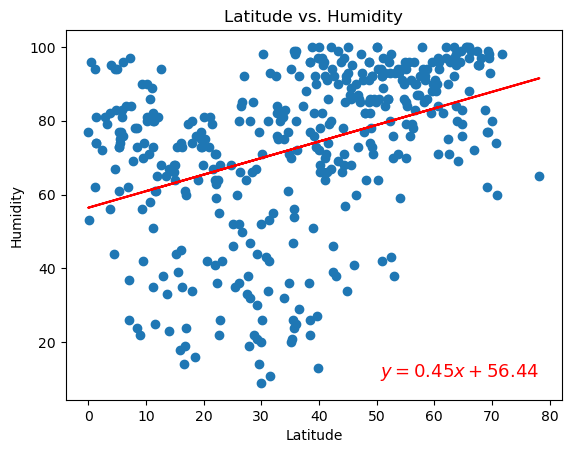

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

import matplotlib.pyplot as plt
from scipy.stats import linregress

# Linear regression on Northern Hemisphere (Humidity vs. Latitude)
x_values_northern = northern_hemi_df['Lat']
y_values_northern = northern_hemi_df['Humidity']

# Perform linear regression for Northern Hemisphere
(slope_northern, intercept_northern, r_value_northern, _, _) = linregress(x_values_northern, y_values_northern)

# Print the r^2 value for Northern Hemisphere
print(f"The r^2-value is: {r_value_northern**2:}")

# Create regression line values for Northern Hemisphere
regress_values_northern = x_values_northern * slope_northern + intercept_northern

# Plot the scatter plot for Northern Hemisphere
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-", label=f"$y = {slope_northern:.2f}x + {intercept_northern:.2f}$")

# Incorporate other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Annotate the linear regression equation at the bottom left for Northern Hemisphere
plt.annotate( f"$y = {slope_northern:.2f}x + {intercept_northern:.2f}$", (max(x_values_northern), min(y_values_northern)), fontsize=13, color="red", verticalalignment='bottom', horizontalalignment='right')

# Show plot for Northern Hemisphere
plt.show()


The r^2-value is: 0.08096875699798846


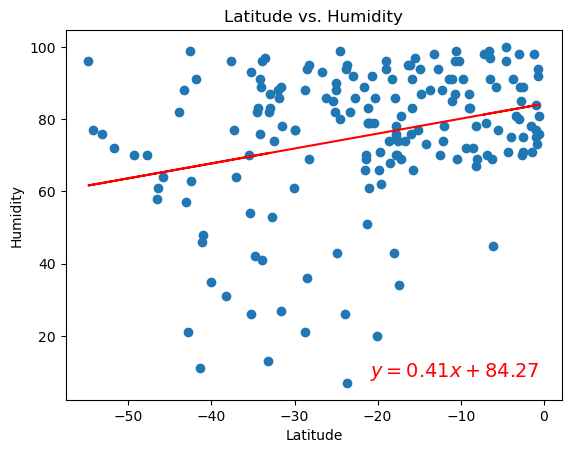

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

import matplotlib.pyplot as plt
from scipy.stats import linregress

# Linear regression on Southern Hemisphere (Humidity vs. Latitude)

# Extract the data for Southern Hemisphere
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Humidity']

# Perform linear regression for Southern Hemisphere
(slope_southern, intercept_southern, r_value_southern, _, _) = linregress(x_values_southern, y_values_southern)

# Print the r^2 value for Southern Hemisphere
print(f"The r^2-value is: {r_value_southern**2:}")

# Create regression line values for Southern Hemisphere
regress_values_southern = x_values_southern * slope_southern + intercept_southern

# Plot the scatter plot for Southern Hemisphere
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-", label=f"$y = {slope_southern:.2f}x + {intercept_southern:.2f}$")

# Incorporate other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Annotate the linear regression equation at the bottom right for Southern Hemisphere
plt.annotate(
    f"$y = {slope_southern:.2f}x + {intercept_southern:.2f}$", 
    (max(x_values_southern), min(y_values_southern)), 
    fontsize=14, 
    color="red", 
    verticalalignment='bottom', 
    horizontalalignment='right'
)

# Show plot for Southern Hemisphere
plt.show()


**Discussion about the linear relationship:** 
Let's consider a simplified linear relationship between latitude (x) and humidity (y). 
From available data, we can create a scatter plot and fit a linear regression line to explore the trend.

In a hypothetical dataset, we might find a linear equation such as:
y=0.41x+84.27 where:

y  represents the humidity in percentage.
x  represents the latitude in degrees.

This equation suggests that for every degree increase in latitude, humidity increases by approximately 0.41%, starting from a base humidity of around 84.27%.

Statistical Significance:
However, the r-squared value for this linear fit is relatively low (0.08096875699798846), indicating that latitude alone does not strongly predict humidity. Other factors contribute significantly to humidity variations, making it a more complex relationship.

Visualization:
Consider a scatter plot where the x-axis represents latitude and the y-axis represents humidity. Each dot represents a data point of latitude and its corresponding humidity, with a linear regression line overlaid to show the trend.




### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0674410626351423


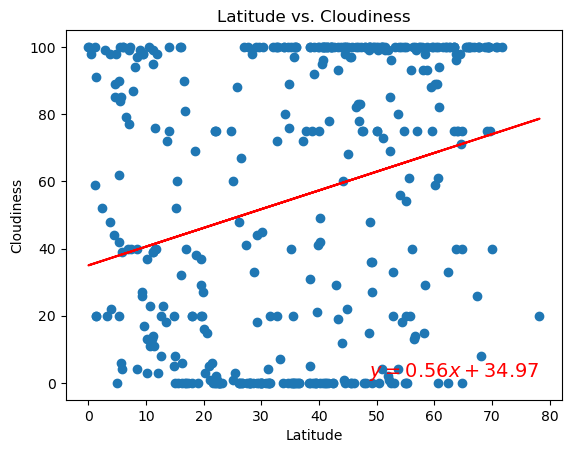

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

import matplotlib.pyplot as plt
from scipy.stats import linregress

# Linear regression on Northern Hemisphere (Cloudiness vs. Latitude)
x_values_northern = northern_hemi_df['Lat']
y_values_northern = northern_hemi_df['Cloudiness']

# Perform linear regression for Northern Hemisphere
(slope_northern, intercept_northern, r_value_northern, _, _) = linregress(x_values_northern, y_values_northern)

# Print the r^2 value for Northern Hemisphere
print(f"The r^2-value is: {r_value_northern**2:}")

# Create regression line values for Northern Hemisphere
regress_values_northern = x_values_northern * slope_northern + intercept_northern

# Plot the scatter plot for Northern Hemisphere
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-", label=f"$y = {slope_northern:.2f}x + {intercept_northern:.2f}$")

# Incorporate other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Annotate the linear regression equation at the bottom right for Northern Hemisphere
plt.annotate(
    f"$y = {slope_northern:.2f}x + {intercept_northern:.2f}$", 
    (max(x_values_northern), min(y_values_northern)), 
    fontsize=14, 
    color="red", 
    verticalalignment='bottom', 
    horizontalalignment='right'
)

# Show plot for Northern Hemisphere
plt.show()



The r^2-value is: 0.06044419499622649


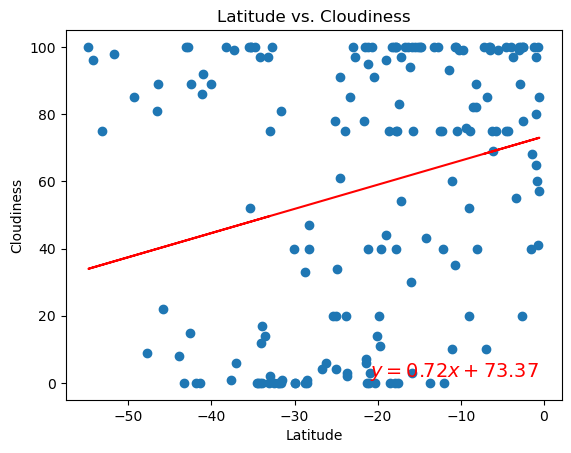

In [20]:
# Southern Hemisphere
# YOUR CODE HERE


import matplotlib.pyplot as plt
from scipy.stats import linregress

# Linear regression on Southern Hemisphere (Cloudiness vs. Latitude)
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Cloudiness']

# Perform linear regression for Southern Hemisphere
(slope_southern, intercept_southern, r_value_southern, _, _) = linregress(x_values_southern, y_values_southern)

# Print the r^2 value for Southern Hemisphere
print(f"The r^2-value is: {r_value_southern**2:}")

# Create regression line values for Southern Hemisphere
regress_values_southern = x_values_southern * slope_southern + intercept_southern

# Plot the scatter plot for Southern Hemisphere
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-", label=f"$y = {slope_southern:.2f}x + {intercept_southern:.2f}$")

# Incorporate other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Annotate the linear regression equation at the bottom right for Southern Hemisphere
plt.annotate(
    f"$y = {slope_southern:.2f}x + {intercept_southern:.2f}$", 
    (max(x_values_southern), min(y_values_southern)), 
    fontsize=14, 
    color="red", 
    verticalalignment='bottom', 
    horizontalalignment='right'
)

# Show plot for Southern Hemisphere
plt.show()


**Discussion about the linear relationship:** 
Northern Hemisphere:
Equation: y=0.56x+34.97
Slope: The slope of 0.56 suggests a slight increase in cloudiness with increasing latitude.
Y-Intercept: 34.97 indicates the estimated cloudiness when the latitude is zero.
R-squared Value: 0.067 (approximately 6.74%) shows a weak relationship, with latitude explaining only a small portion of the variance in cloudiness.
Pattern: The scatter plot shows no clear or strong pattern, with data points widely spread.



Southern Hemisphere:
Equation: y=0.72x+73.37
Slope: The slope of 0.72 suggests a slight increase in cloudiness with increasing latitude.
Y-Intercept: 73.37 indicates the estimated cloudiness when the latitude is zero.
R-squared Value: 0.0604 (approximately 6%) shows a weak relationship, with latitude explaining only a small portion of the variance in cloudiness.
Pattern: The scatter plot shows a wide spread of cloudiness values with no clear pattern.

Conclusion:

In both hemispheres, the relationship between latitude and cloudiness is weak, as indicated by the low r-squared values (around 6-7%).
Both regression lines have positive slopes, indicating a slight increase in cloudiness with latitude, but the r-squared values suggest that this relationship is not statistically significant.
The scatter plots in both hemispheres show a wide spread of data points, with no clear or strong patterns, suggesting that other factors likely have a more significant impact on cloudiness.

In summary, latitude does not seem to be a strong predictor of cloudiness in either hemisphere. The weak positive slopes suggest a slight trend, but the low r-squared values indicate that other factors play a more substantial role in determining cloudiness




### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0031171249016217484


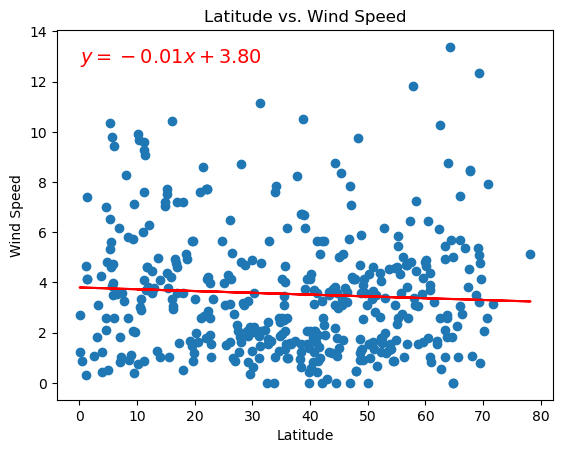

In [25]:
# Northern Hemisphere
# YOUR CODE HERE


import matplotlib.pyplot as plt
from scipy.stats import linregress

# Linear regression on Northern Hemisphere (Wind Speed vs. Latitude)
x_values_northern = northern_hemi_df['Lat']
y_values_northern = northern_hemi_df['Wind Speed']

# Perform linear regression for Northern Hemisphere
(slope_northern, intercept_northern, r_value_northern, _, _) = linregress(x_values_northern, y_values_northern)

# Print the r^2 value for Northern Hemisphere
print(f"The r^2-value is: {r_value_northern**2:}")

# Create regression line values for Northern Hemisphere
regress_values_northern = x_values_northern * slope_northern + intercept_northern

# Plot the scatter plot for Northern Hemisphere
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-", label=f"$y = {slope_northern:.2f}x + {intercept_northern:.2f}$")

# Incorporate other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Annotate the linear regression equation at the bottom right for Northern Hemisphere
plt.annotate(
    f"$y = {slope_northern:.2f}x + {intercept_northern:.2f}$", 
    (min(x_values_northern), max(y_values_northern)), 
    fontsize=14, 
    color="red", 
    verticalalignment='top', 
    horizontalalignment='left'
)

# Show plot for Northern Hemisphere
plt.show()


The r^2-value is: 0.03468228001132806


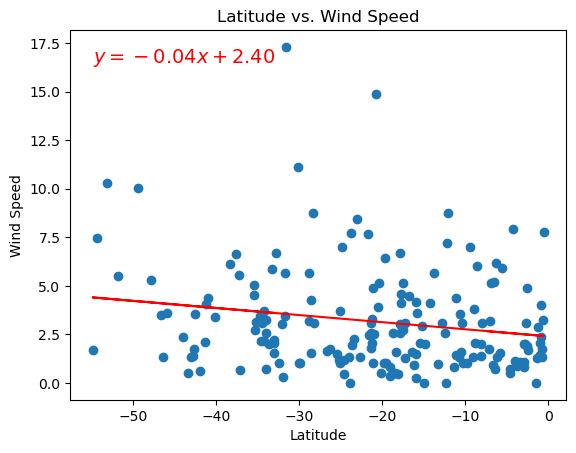

In [27]:
# Southern Hemisphere
# YOUR CODE HERE

import matplotlib.pyplot as plt
from scipy.stats import linregress

# Linear regression on Southern Hemisphere (Wind Speed vs. Latitude)
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Wind Speed']

# Perform linear regression for Southern Hemisphere
(slope_southern, intercept_southern, r_value_southern, _, _) = linregress(x_values_southern, y_values_southern)

# Print the r^2 value for Southern Hemisphere
print(f"The r^2-value is: {r_value_southern**2:}")

# Create regression line values for Southern Hemisphere
regress_values_southern = x_values_southern * slope_southern + intercept_southern

# Plot the scatter plot for Southern Hemisphere
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-", label=f"$y = {slope_southern:.2f}x + {intercept_southern:.2f}$")

# Incorporate other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Annotate the linear regression equation at the bottom right for Southern Hemisphere
plt.annotate(
    f"$y = {slope_southern:.2f}x + {intercept_southern:.2f}$", 
    (min(x_values_southern), max(y_values_southern)), 
    fontsize=14, 
    color="red", 
    verticalalignment='top', 
    horizontalalignment='left'
)

# Show plot for Southern Hemisphere
plt.show()


**Discussion about the linear relationship:** 
Latitude and Wind Speed Relationship:
In both the Northern and Southern Hemispheres, the relationship between latitude and wind speed is weak, as indicated by the low r-squared values (approximately 0.31% for the Northern Hemisphere and 3.47% for the Southern Hemisphere).
The regression lines show a very slight negative slope, indicating a minor decrease in wind speed with increasing latitude. However, this relationship is so weak that it's practically negligible.

Predictive Power:
Latitude is not a strong predictor of wind speed in either hemisphere. The low r-squared values suggest that latitude explains only a tiny portion of the variance in wind speed.
The scatter plots for both hemispheres show a wide spread of data points, indicating that other factors likely play a more significant role in determining wind speed.

Conclusion:
In summary, the analysis indicates that latitude does not have a significant impact on wind speed in either the Northern or Southern Hemisphere. The weak negative slopes and low r-squared values highlight that many other factors, such as atmospheric pressure, temperature differences, and geographical features, are likely to have a more substantial influence on wind speed.


